# Getting Started

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

   1. 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
   2. 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
   3. The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
   4. The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


# DATA EXPLORATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CFB8C51780>,
      dtype=object)

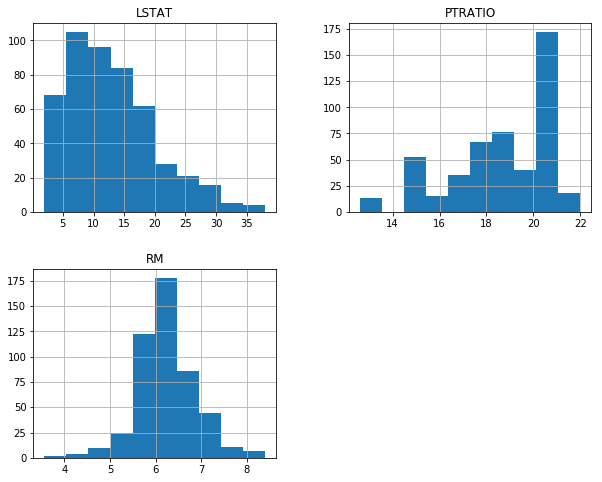

In [4]:
data[['RM', 'LSTAT', 'PTRATIO']].hist(figsize = (10,8))

In [5]:
X = data.drop('MEDV', axis = 1).values
y = data['MEDV'].values

In [6]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


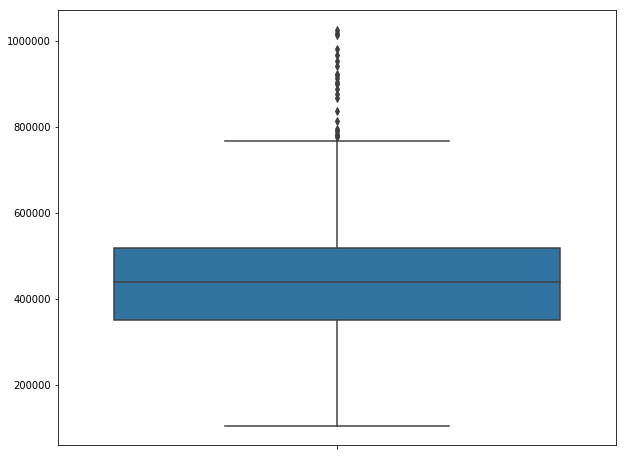

In [7]:
# Boxplot of prices to get a sense of the data
plt.figure(figsize = (10,8))
sns.boxplot(y = y)

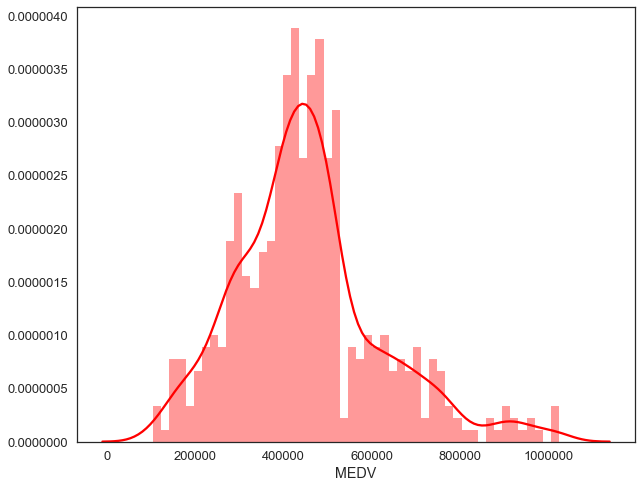

In [8]:
sns.set(style="white", context="talk")
plt.figure(figsize  = (10,8))
sns.distplot(data['MEDV'], bins = 50, color="r")

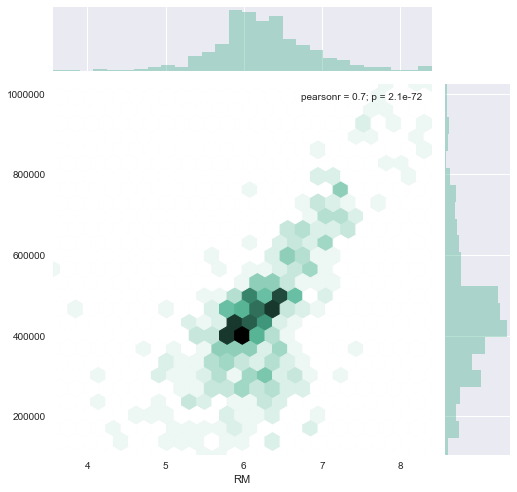

In [9]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x = data['RM'], y = y, kind = 'hex', color="#4CB391", size = 7)

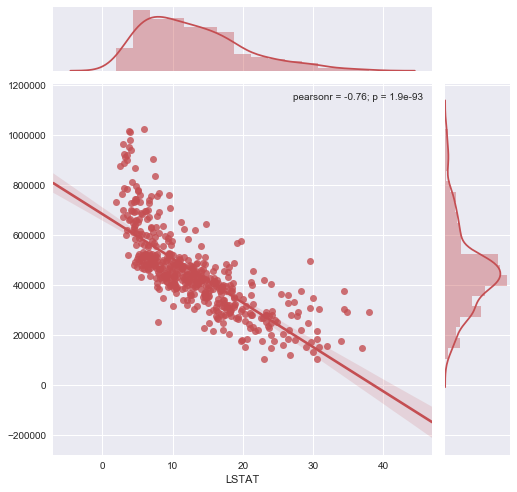

In [10]:
sns.jointplot(x = data['LSTAT'], y = y, kind = 'reg', color="r", size=7)

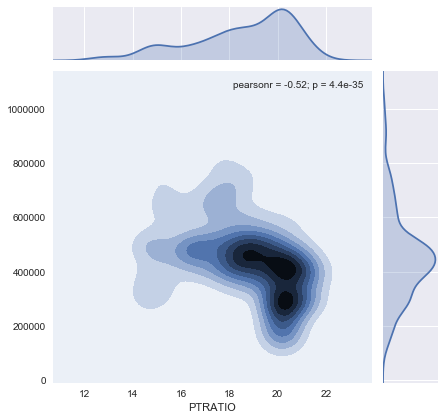

In [11]:
sns.jointplot(x = data['PTRATIO'], y = y, kind = 'kde')

# FEATURES OBSERVATION

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

    'RM' is the average number of rooms among homes in the neighborhood.
    'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
    'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

'RM': increase.

   An increase in the value of 'RM' should lead to an increase in the value of 'MEDV'.
    Intuitively, homes with more rooms should have larger floor area.
    Homes with larger floor area should be more expensive than homes with small area (if price per square foot is is similar), hence the guess for a positive relationship.
    However, homes in cities with high prices and high prices per square foot (cities such as Hong Kong or New York) tend to be much smaller on average than homes in say rural France. If we compared homes in Hong Kong with homes in rural France, there would be a negative relationship between 'RM' and 'MEDV'.
    But it is unlikely than there will be such high and large-scale regional variance within Boston.

'LSTAT': decrease.

   An increase in the value of 'LSTAT' should lead to an decrease in the value of 'MEDV'.
    If more people in the neighbourhood are the 'working poor', given (1) they usually have low income (by definition) and (2) they should've been able to afford their homes, their homes should tend to be relatively cheap.
    Thus, the higher 'LSTAT' is, the higher the percentage of relatively cheap homes in the area is likely to be.
    The higher the percentage of relatively cheap homes in the area, the lower the average price of homes in the area.

'PTRATIO': increase.

   An increase in the value of 'RM' should lead to an increase in the value of 'MEDV'.
    A higher 'PTRATIO' means there are more students to one teacher in schools.
    Maintaining lower student-to-teacher ratios is more expensive and thus usually reflects more funding to schools either through tuition fees or donations.
    This usually means people in the area are relatively well-off.
    People who are more well-off often choose to buy more expensive homes since homes are normal goods. (As income increases, amount spent on said good increases.)
    Thus the homes in the area are likely to be more expensive. That is, 'MDEV' is likely to be higher.



# Define a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

In [12]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# TRAIN TEST SPLIT THE DATA

In [13]:
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [14]:
print("Train shapes (X,y): ", X_train.shape, y_train.shape)
print("Test shapes (X,y): ", X_test.shape, y_test.shape)

Train shapes (X,y):  (391, 3) (391,)
Test shapes (X,y):  (98, 3) (98,)


# Fitting a Model

Your final implementation requires that you bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

For the fit_model function in the code cell below, you will need to implement the following:

    1. Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.
        a. Assign this object to the 'regressor' variable.
    2. Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.
    3. Use make_scorer from sklearn.metrics to create a scoring function object.
        a. Pass the performance_metric function as a parameter to the object.
        b. Assign this scoring function to the 'scoring_fnc' variable.
    4. Use GridSearchCV from sklearn.grid_search to create a grid search object.
        Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.
        Assign the GridSearchCV object to the 'grid' variable.


In [20]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':(1,2,4,5,7,8,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Making Predictions

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

In [22]:
print("The optimal value for 'max_depth' is : {}".format(reg.get_params()['max_depth']))

The optimal value for 'max_depth' is : 4


# Predicting Selling Prices

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

In [23]:
data1 = pd.DataFrame({'Features': ['Total number of rooms in home', 'Neighborhood poverty level (as %)', 'Student-teacher ratio of nearby schools'],
                     'Client 1':['5 rooms', '17%', '15-to-1'],
                     'Client 2': ['4 rooms', '32%', '22-to-1'],
                     'Client 3': ['8 rooms', '3%', '12-to-1']})

In [24]:
data1

,Client 1,Client 2,Client 3,Features
0,5 rooms,4 rooms,8 rooms,Total number of rooms in home
1,17%,32%,3%,Neighborhood poverty level (as %)
2,15-to-1,22-to-1,12-to-1,Student-teacher ratio of nearby schools


In [25]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3
reg.predict(client_data)

array([417260.86956522, 230622.        , 946633.33333333])

In [26]:
client_prices = []
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    client_prices.append(price)

Predicted selling price for Client 1's home: $417,260.87
Predicted selling price for Client 2's home: $230,622.00
Predicted selling price for Client 3's home: $946,633.33




The recommended selling prices are:

    Client 1: \$407,232
    Client 2: \$229,200
    Client 3: \$979,300

By intuition in Q1:

    Client 3 has the highest RMSTAT (intuited positive relationship with price), the lowest STRATIO and the lowest LSTAT (Both intuited negative rel with price).
    Client 2 has the lowest RMSTAT, the highest STRATIO and the highest LSTAT.
    So based on intuition from Question 1, the ordering of prices (Client 3 > Client 1 > Client 2) is reasonable.

